In [1]:
# Библиотеки
import math
import matplotlib.pyplot as plt
import numpy as np

Константы

In [2]:
# ускорение свободного падения
g = 9.8

# Гравитационный параметр Кербина
u  = 3.532*10**12

Характеристики ступеней

In [227]:
# Первая ступень (Восхождение)
# удельный импульс двигателя ЖРД S3 KS-25 
Rud1 = 315*9.8
# начальная масса корабля(Мсух + Мтоплива)
Mo1 = 370310
# конечная масса корабля(Мсух)
M1 = 244310

# Вторая ступень (Выход на орбиту Кербина)
# удельный импульс двигателя ЖРД S3 KS-25 
Rud2 = 315*9.8
# начальная масса корабля(Мсух + Мтоплива)
Mo2 = 203102
# конечная масса корабля(Мсух)
M2 = 113102

# Третяя ступень (1 часть) (TMI, прилунение, возвращение)
# удельный импульс двигателя ЖРД LV-T30 
Rud3 = 310*9.8
# начальная масса корабля(Мсух + Мтоплива)
Mo31 = 81233
# конечная масса корабля(Мсух)
M31 = 47233
# начальная масса корабля(Мсух + Мтоплива)
Mo32 = 39156
# конечная масса корабля(Мсух)
M32 = 27956


Расчет xарактеристической скорости

In [228]:
v1 = Rud1*math.log(Mo1/M1)
v2 = Rud2*math.log(Mo2/M2)
v3 = Rud3*math.log(Mo31/M31)+Rud3*math.log(Mo32/M32)

print("Stage 1 v:",v1)
print("Stage 2 v:", v2)
print("Stage 3 v:", v3)
print()

print("Total v:", v1+v2+v3)

Stage 1 v: 1283.8912705759744
Stage 2 v: 1807.186136120065
Stage 3 v: 2670.8594908782256

Total v: 5761.9368975742655


Расчет характерестической скорости для перехода с орбиты Кербина на орбиту Муны

In [229]:
# r1 - орбита Кербина r2 - орбита Муны 
r1 = 200000
r2 = 12000000
v1 = math.sqrt(u/r2)*(math.sqrt((2*r2)/(r1+r2))-1)
v2 = math.sqrt(u/r2)*(1-math.sqrt(2*r1/(r1+r2)))

print(v1+v2)

662.6954630404346


Расход топлива и время работы двигателя

In [230]:
# дельта M1
dM1 = Mo1-M1
# расход топлива 1 ступени (5 дивигателей)
m1 = 1000*1000*5/Rud1

print("Расход топлива 1 ступени:", m1)
print(f"Время работы 1 ступени: {dM1/m1//60}m {dM1/m1%60}s")
print()

# дельта M2
dM2 = Mo2-M2
# расход топлива 2 ступень (4 двигателя)
m2 = 1000*1000*4*0.75/Rud2


print("Расход топлива 2 ступени:", m2)
print(f"Время работы 2 ступени {dM2/m2//60}m {dM2/m2%60}s")
print()

#дельта M3
dM31 = Mo31-M31
dM32 = Mo32-M32
m3 = 1000*1000/Rud3

print("Расход топлива 3 ступени:", m3)
print(f"Время работы 3 ступени {dM31/m3//60+dM32/m3//60}m {dM31/m3%60+dM32/m3%60}s")

Расход топлива 1 ступени: 1619.6954972465176
Время работы 1 ступени: 1.0m 17.7924s

Расход топлива 2 ступени: 971.8172983479105
Время работы 2 ступени 1.0m 32.61s

Расход топлива 3 ступени: 329.1639236339697
Время работы 3 ступени 1.0m 77.3176s


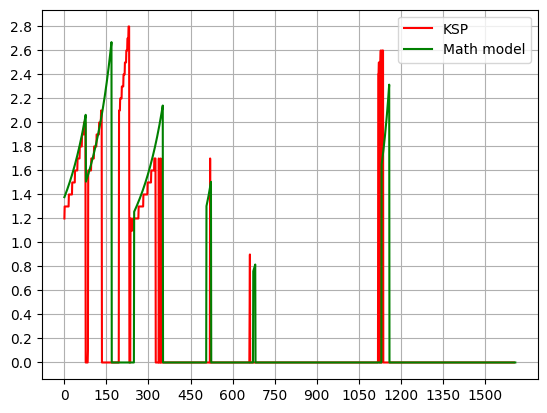

In [231]:



f = open("flight.log", "r")
twr_list = []
for i in f.readlines():
    if(i.find("TWR") != -1):
        twr_list.append(float(i[i.find("TWR")+5:i.find("TWR")+8]))


f.close()

theoretical_twr = []
for i in range(int(dM1//m1)):
    theoretical_twr.append(1000*1000*5/(Mo1)/g)
    Mo1 -= m1
    
for i in range(int(dM2//m2)):
    theoretical_twr.append(1000*1000*4*0.75/(Mo2)/g)
    Mo2 -= m2 
    
for i in range(80):
    theoretical_twr.append(0)
        
    
for i in range(int(dM31//m3)):
    theoretical_twr.append(1000*1000/(Mo31)/g)
    Mo31 -= m3    
    
    
for i in range(155):
    theoretical_twr.append(0)
    
for i in range(int(dM32//m3//2)):
    theoretical_twr.append(1000*1000*0.5/(Mo32)/g)
    Mo32 -= m3
    
for i in range(150):
    theoretical_twr.append(0)
for i in range(int(dM32//m3//4)):
    theoretical_twr.append(1000*1000*0.25/(Mo32)/g)
    Mo32 -= m3
    
    
for i in range(450):
    theoretical_twr.append(0)
    

for i in range(int(dM32//m3)):
    theoretical_twr.append(1000*1000*0.5/(Mo32)/g)
    Mo32 -= m3

    
for i in range(450):
    theoretical_twr.append(0)
    
    
plt.plot(range(len(twr_list)), [twr for twr in twr_list], color="red", label="KSP")
plt.plot(range(len(theoretical_twr)), [twr for twr in theoretical_twr], color="green", label="Math model")
plt.xticks(np.arange(0, 1600, 150))
plt.yticks(np.arange(0, 3, 0.2))
plt.grid(True)

plt.legend()
plt.show()